In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering

import warnings
warnings.filterwarnings('ignore')

In [341]:
df = pd.read_csv('Country-data.csv')


In [342]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


# Данные стран
country: Название страны

child-mort: Смертность детей до 5 лет на 1000 живорождений

exports: Экспорт товаров и услуг на душу населения. Указан как % от ВВП на душу населения

health: Общие расходы на здравоохранение на душу населения. Указан как % от ВВП на душу населения

imports: Импорт товаров и услуг на душу населения. Указан как % от ВВП на душу населения

income: Чистый доход на человека

inflation: Измерение годового темпа роста общего ВВП

life_expec: Среднее количество лет, которое проживет новорожденный ребенок, если текущие показатели смертности останутся неизменными

total_fer: Количество детей, рожденных одной женщиной, если текущие уровни рождаемости останутся неизменными

gdpp: ВВП на душу населения. Рассчитывается как общий ВВП, деленный на общую численность населения.

# Просмотр и предобработка данных

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [344]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Проверили на Nan значения, их не оказалось

In [345]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


Проверили на дубликаты значения, дублирующихся значений не оказалось

In [346]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


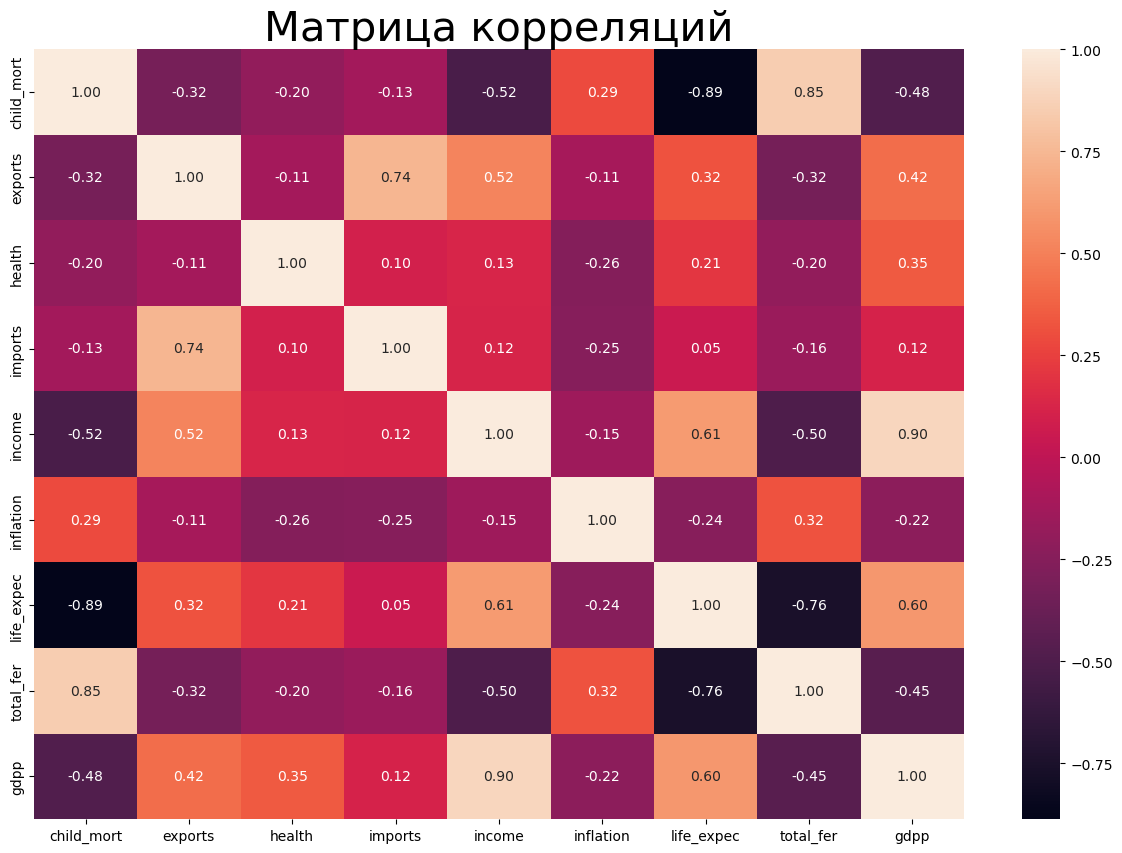

In [347]:
corr  = df.drop('country',axis=1).corr()

fig = plt.subplots(figsize = (15,10))
sns.heatmap(corr, annot = True, fmt='.2f')
plt.title('Матрица корреляций', fontsize = 30)
plt.show()

# Россия

In [348]:
russia_data = df[df['country'] == 'Russia']
russia_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
125,Russia,10.0,29.2,5.08,21.1,23100,14.2,69.2,1.57,10700


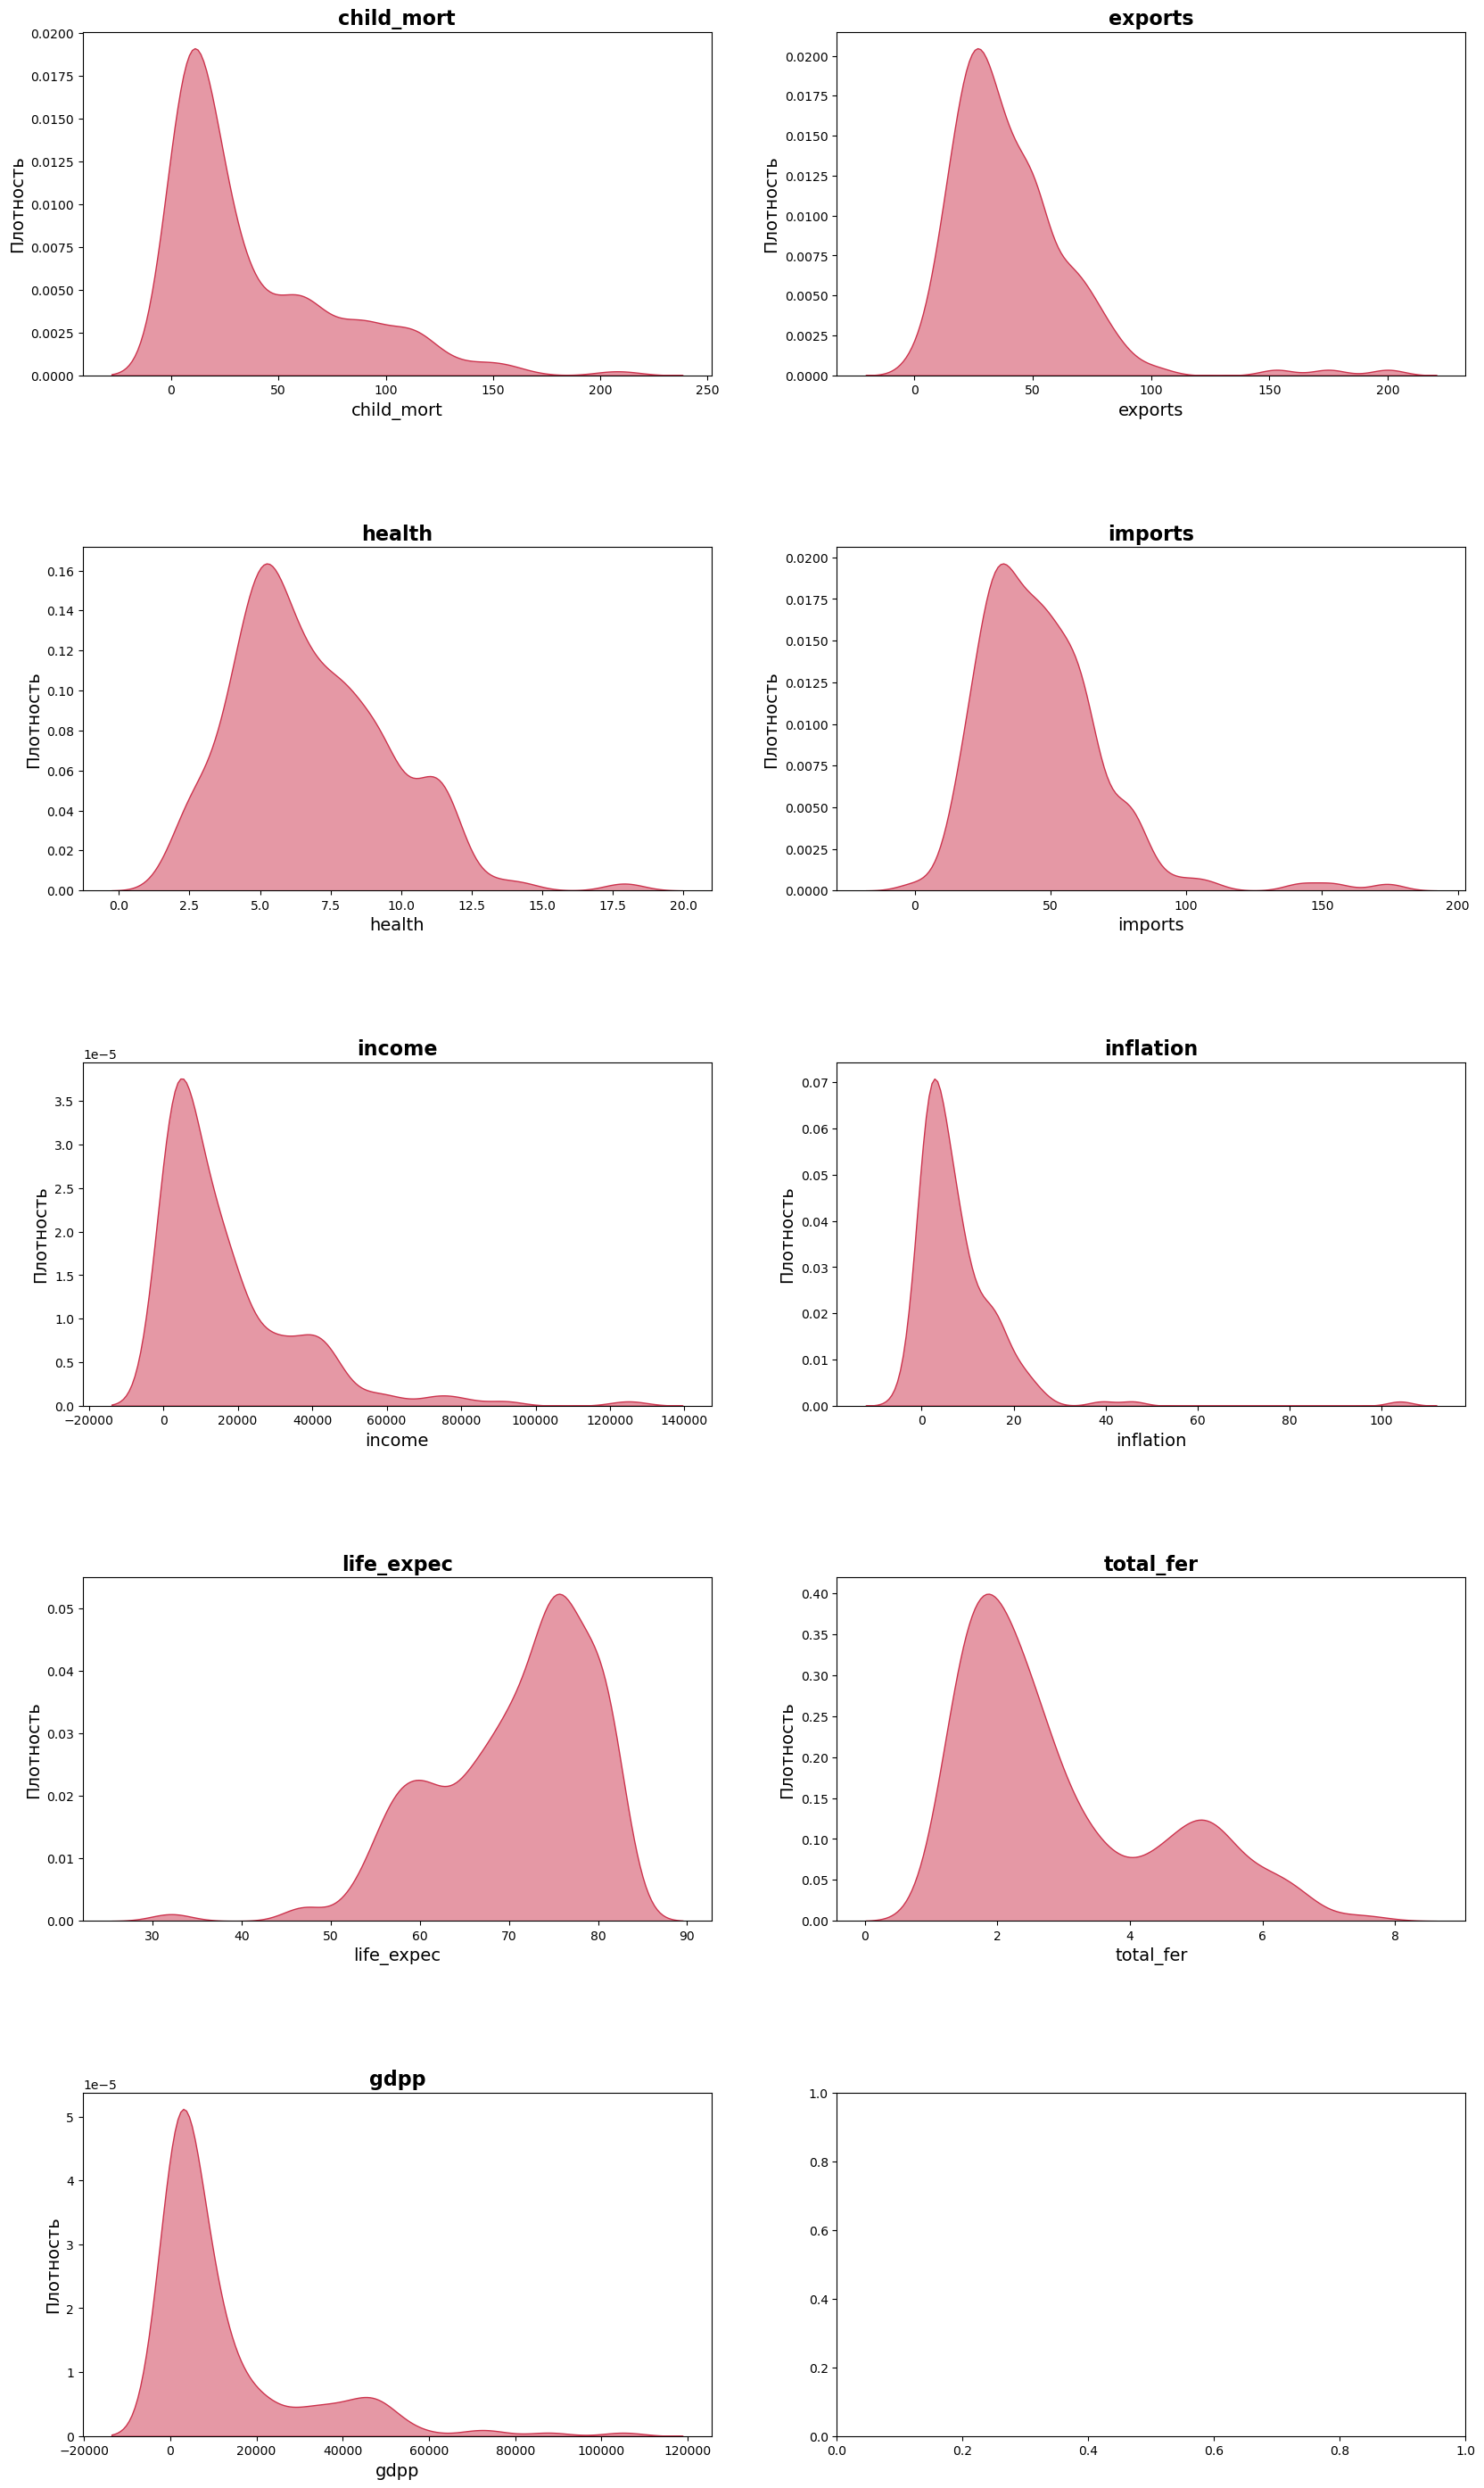

In [349]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(5,2, figsize = (20,35))
X = df.iloc[:, 1:]
# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = X.columns

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = X,
                x = column,
                fill = True,
                alpha = 0.5,
                bw_adjust=.7,
                color = [0.8, 0.2, 0.3],
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

In [350]:
df2 = df.drop('country',axis=1)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [351]:
mms = MinMaxScaler()
df2=pd.DataFrame(mms.fit_transform(df2), columns=df2.columns)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [352]:
df2.describe()
X = df2.iloc[:, 1:]
y = df2.iloc[:, 0]

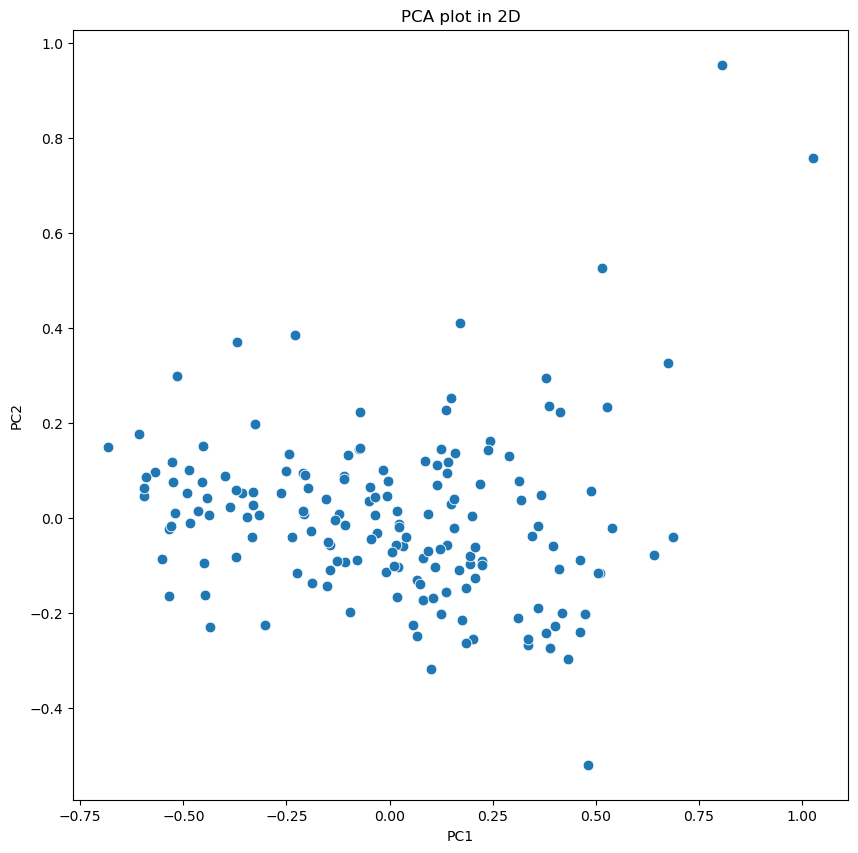

In [353]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [354]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(X)), 
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

In [355]:
PCAplot3D(X)

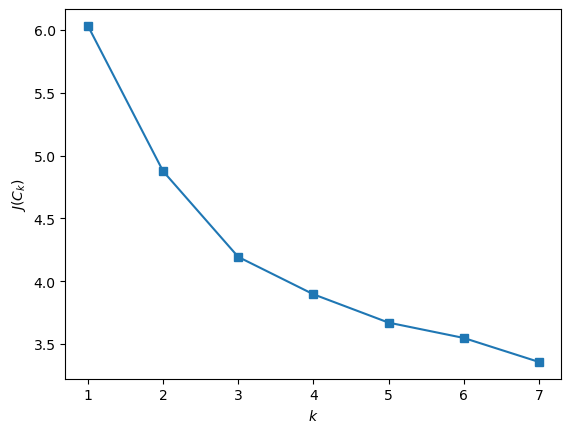

In [356]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

In [357]:
import warnings
warnings.filterwarnings('ignore')
pca = PCA(n_components=2)

kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

In [358]:
df["cluster"] = pd.Series(pred_k)

In [359]:
df.cluster.value_counts()

cluster
0    84
2    49
1    34
Name: count, dtype: int64

In [360]:
a = df[df.cluster == 0]
a['country'].head(50)

1                    Albania
2                    Algeria
4        Antigua and Barbuda
5                  Argentina
6                    Armenia
9                 Azerbaijan
10                   Bahamas
11                   Bahrain
12                Bangladesh
13                  Barbados
14                   Belarus
16                    Belize
18                    Bhutan
19                   Bolivia
20    Bosnia and Herzegovina
21                  Botswana
22                    Brazil
24                  Bulgaria
27                  Cambodia
30                Cape Verde
33                     Chile
34                     China
35                  Colombia
39                Costa Rica
41                   Croatia
45        Dominican Republic
46                   Ecuador
47                     Egypt
48               El Salvador
51                   Estonia
52                      Fiji
57                   Georgia
61                   Grenada
62                 Guatemala
65            

In [361]:
df[df.cluster == 0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,22.72619,41.343917,6.152500,46.621023,13223.809524,7.764774,72.757143,2.221310,6938.238095,0.0
std,15.83039,19.319668,2.026957,19.742949,8621.030451,7.822169,4.532461,0.585141,5308.395591,0.0
min,4.50000,0.109000,1.970000,0.065900,1990.000000,-4.210000,54.300000,1.250000,592.000000,0.0
25%,11.10000,27.575000,4.832500,31.375000,7297.500000,2.367500,70.375000,1.712500,2985.000000,0.0
50%,18.10000,37.650000,5.930000,48.250000,11150.000000,6.225000,73.850000,2.185000,5430.000000,0.0
75%,29.22500,51.825000,7.492500,59.675000,17500.000000,10.025000,76.100000,2.625000,10400.000000,0.0
max,78.90000,93.800000,11.700000,108.000000,45400.000000,45.900000,80.400000,3.660000,28000.000000,0.0


In [362]:
a = df[df.cluster == 1]
a['country'].head(50)

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [363]:
df[df.cluster == 1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,4.835294,57.905882,8.921176,50.735294,46408.823529,2.595294,80.385294,1.750294,43897.058824,1.0
std,2.130711,43.025320,3.201922,37.658706,21148.656633,4.098247,1.504364,0.373383,18595.152273,0.0
min,2.600000,12.400000,1.810000,13.600000,27200.000000,-3.220000,76.500000,1.150000,19800.000000,1.0
25%,3.450000,29.300000,7.797500,28.200000,32850.000000,0.424000,79.825000,1.445000,31525.000000,1.0
50%,4.200000,49.800000,9.485000,37.400000,40550.000000,1.190000,80.400000,1.815000,41850.000000,1.0
75%,5.100000,66.525000,10.925000,61.550000,48475.000000,3.520000,81.400000,1.945000,48625.000000,1.0
max,10.800000,200.000000,17.900000,174.000000,125000.000000,16.700000,82.800000,3.030000,105000.000000,1.0


In [364]:
a = df[df.cluster == 2]
a['country'].head(50)

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
101       Micronesia, Fed. Sts.
106                  Mozambique
108     

In [365]:
df[df.cluster == 2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,88.116327,29.051224,6.491633,44.683673,3560.469388,11.409898,59.961224,5.024694,1830.653061,2.0
std,37.910296,18.226298,2.814908,19.036154,5231.628511,15.381585,6.703258,0.946012,2738.614024,0.0
min,17.400000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,62.700000,16.800000,4.750000,30.900000,1390.000000,3.560000,57.300000,4.370000,553.000000,2.0
50%,89.300000,23.800000,5.660000,42.900000,1870.000000,6.810000,60.500000,5.050000,967.000000,2.0
75%,111.000000,39.400000,7.910000,53.100000,3340.000000,16.600000,64.000000,5.560000,1490.000000,2.0
max,208.000000,85.800000,14.200000,101.000000,33700.000000,104.000000,71.500000,7.490000,17100.000000,2.0


Пользуясь методом локтя мы видим что в среднем данные разделяются на 2 кластера.

## KMEANS

In [366]:
pca = PCA(n_components=2)


kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

Выполняем кластеризацию методом KMeans с тремя кластерами. Сохраняются метки кластеров, на их основе создаем графики.

In [367]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

In [368]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

Сохраняем метки кластеров для дальнейшего обучения моделей.

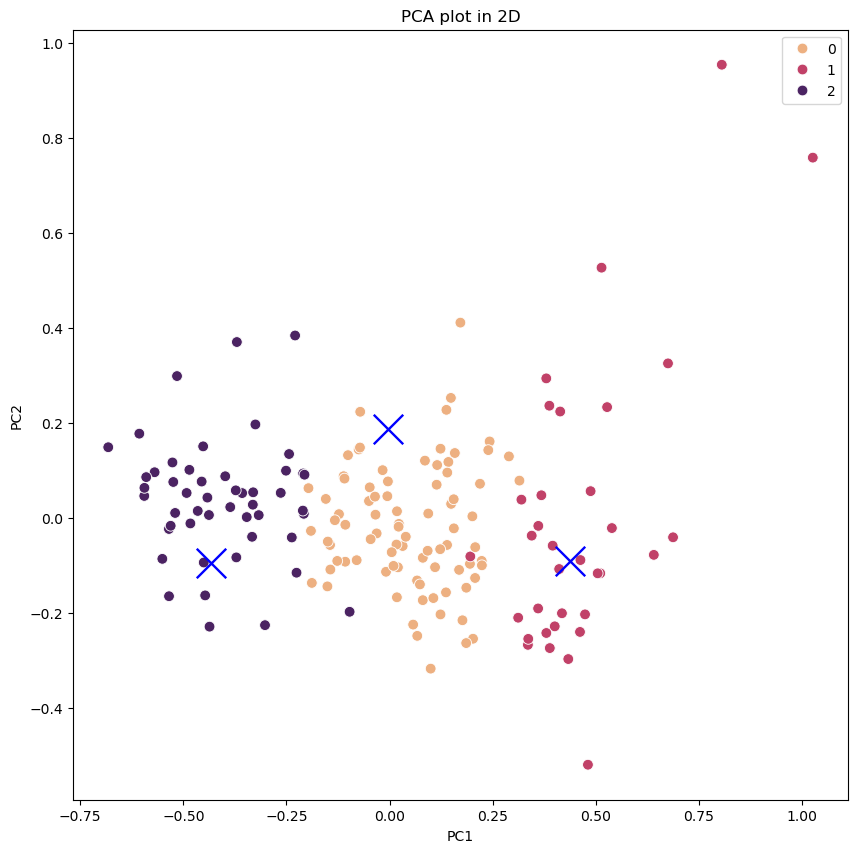

In [369]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [370]:
PCAplot3D(X, pred_k)

## AgglomerativeClustering

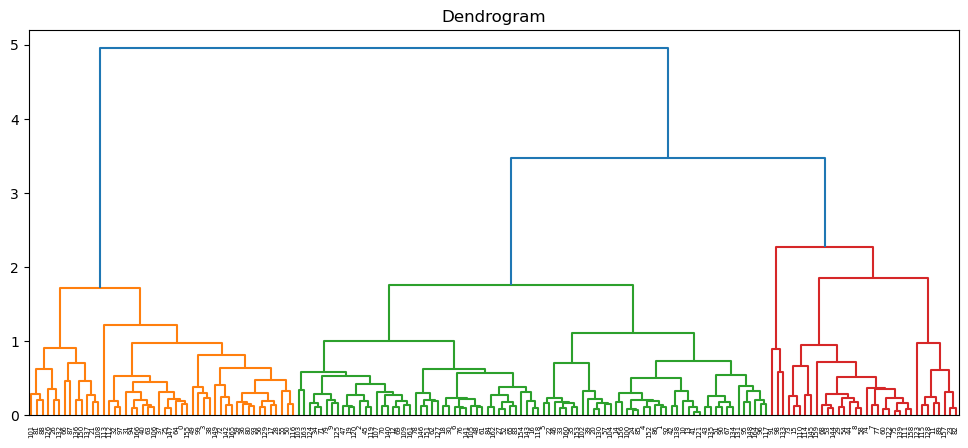

In [371]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

## SpectralClustering

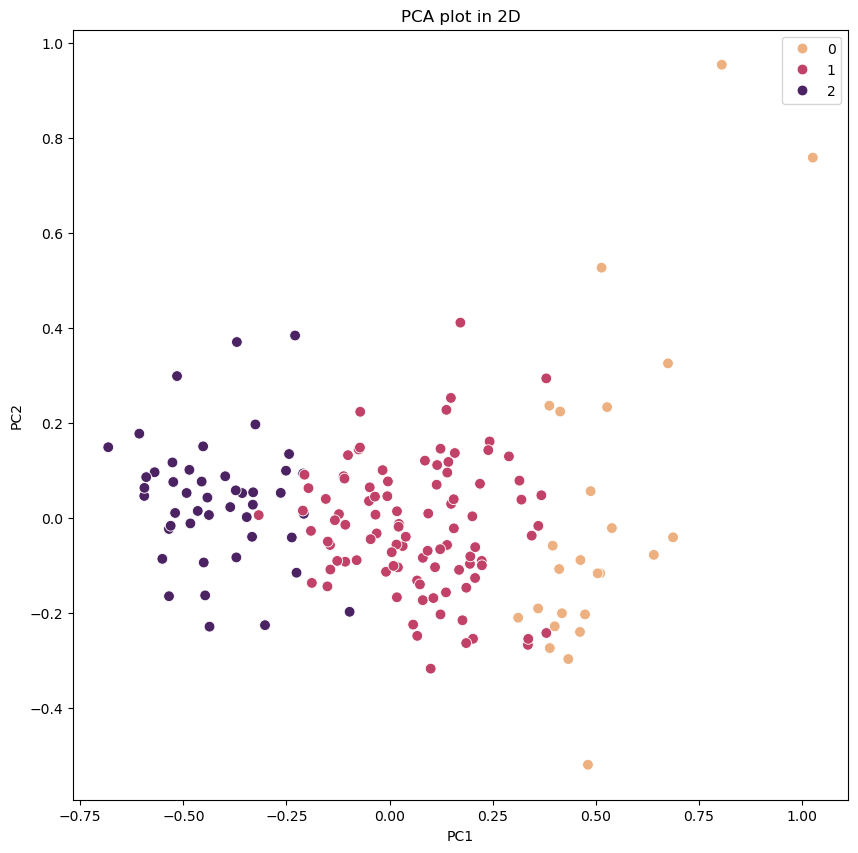

In [372]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [373]:
PCAplot3D(X, pred_sp)

# Класификация

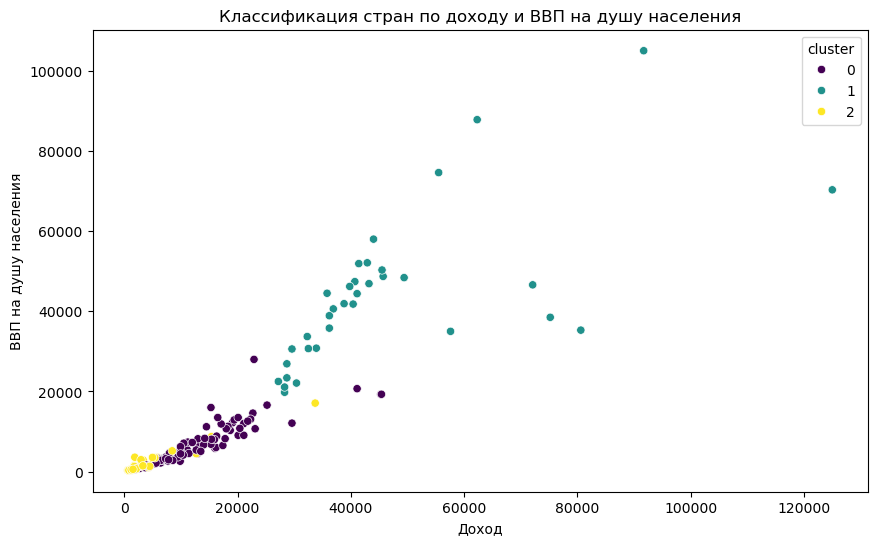

In [374]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Выбор признаков для классификации
features = df.columns[1:]
X = df[features]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Классификация с использованием KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='gdpp', hue='cluster', data=df, palette='viridis')
plt.title('Классификация стран по доходу и ВВП на душу населения')
plt.xlabel('Доход')
plt.ylabel('ВВП на душу населения')
plt.show()

In [375]:
# Разрез каждого кластера
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    print(f"Кластер {cluster}:")
    print(cluster_data[['country', 'income', 'gdpp']])
    print("\n")



Кластер 2:
                      country  income   gdpp
0                 Afghanistan    1610    553
3                      Angola    5900   3530
17                      Benin    1820    758
25               Burkina Faso    1430    575
26                    Burundi     764    231
28                   Cameroon    2660   1310
31   Central African Republic     888    446
32                       Chad    1930    897
36                    Comoros    1410    769
37           Congo, Dem. Rep.     609    334
38                Congo, Rep.    5190   2740
40              Cote d'Ivoire    2690   1220
49          Equatorial Guinea   33700  17100
50                    Eritrea    1420    482
55                      Gabon   15400   8750
56                     Gambia    1660    562
59                      Ghana    3060   1310
63                     Guinea    1190    648
64              Guinea-Bissau    1390    547
66                      Haiti    1500    662
72                       Iraq   12700   4500

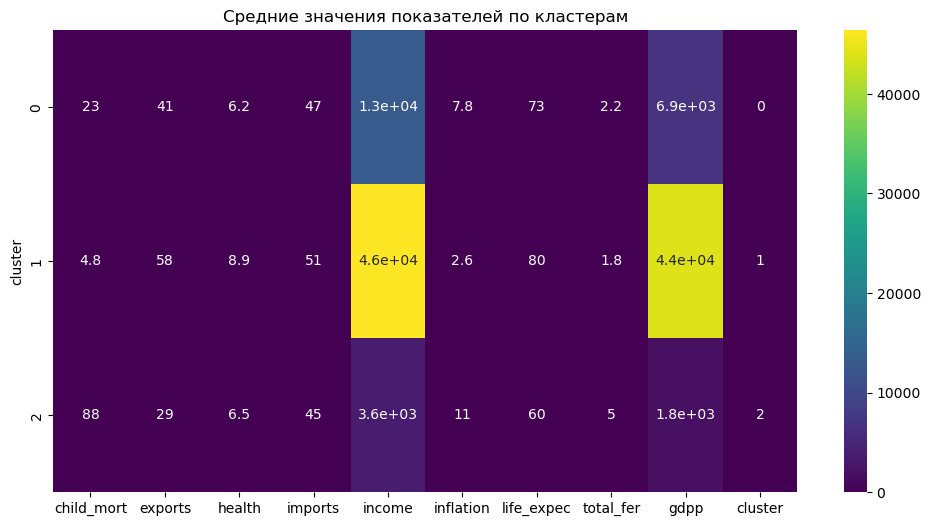

In [376]:
numeric_columns = df.select_dtypes(include=['number'])

cluster_means = numeric_columns.groupby(df['cluster']).mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Средние значения показателей по кластерам')
plt.show()

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

X = df2 
ydf = df['cluster'] 

X_train, X_test, y_train, y_test = train_test_split(X, ydf, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

knn_classifier = KNeighborsClassifier() 
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       1.00      1.00      1.00        12
           2       0.89      1.00      0.94        17

    accuracy                           0.97        67
   macro avg       0.96      0.98      0.97        67
weighted avg       0.97      0.97      0.97        67

Confusion Matrix:
[[36  0  2]
 [ 0 12  0]
 [ 0  0 17]]

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        38
           1       1.00      0.67      0.80        12
           2       1.00      0.94      0.97        17

    accuracy                           0.93        67
   macro avg       0.96      0.87      0.90        67
weighted avg       0.93      0.93      0.92        67

Confusion Matrix:
[[38  0  0]
 [ 4  8  0]
 [ 1  0 16]]

Gaussian Naive Bayes Classification Report:
 

# Обучение моделей на основе полученных данных

In [378]:
rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 167 предсказано верно \n\n\n\n".format(rs_k, rs_k * 167))


print('Agglomerative Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 167 предсказано верно \n\n\n\n".format(rs_ward, rs_ward * 167))


print('Spectral Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 167 предсказано верно \n".format(rs_sp, rs_sp * 167))



K-Means
_____________________________________________

 rand_score = 0.6247024024240675 

 104.32530120481927 из 167 предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.6215280282807878 

 103.79518072289156 из 167 предсказано верно 




Spectral Clustering
_____________________________________________

 rand_score = 0.5760767621383739 

 96.20481927710844 из 167 предсказано верно 



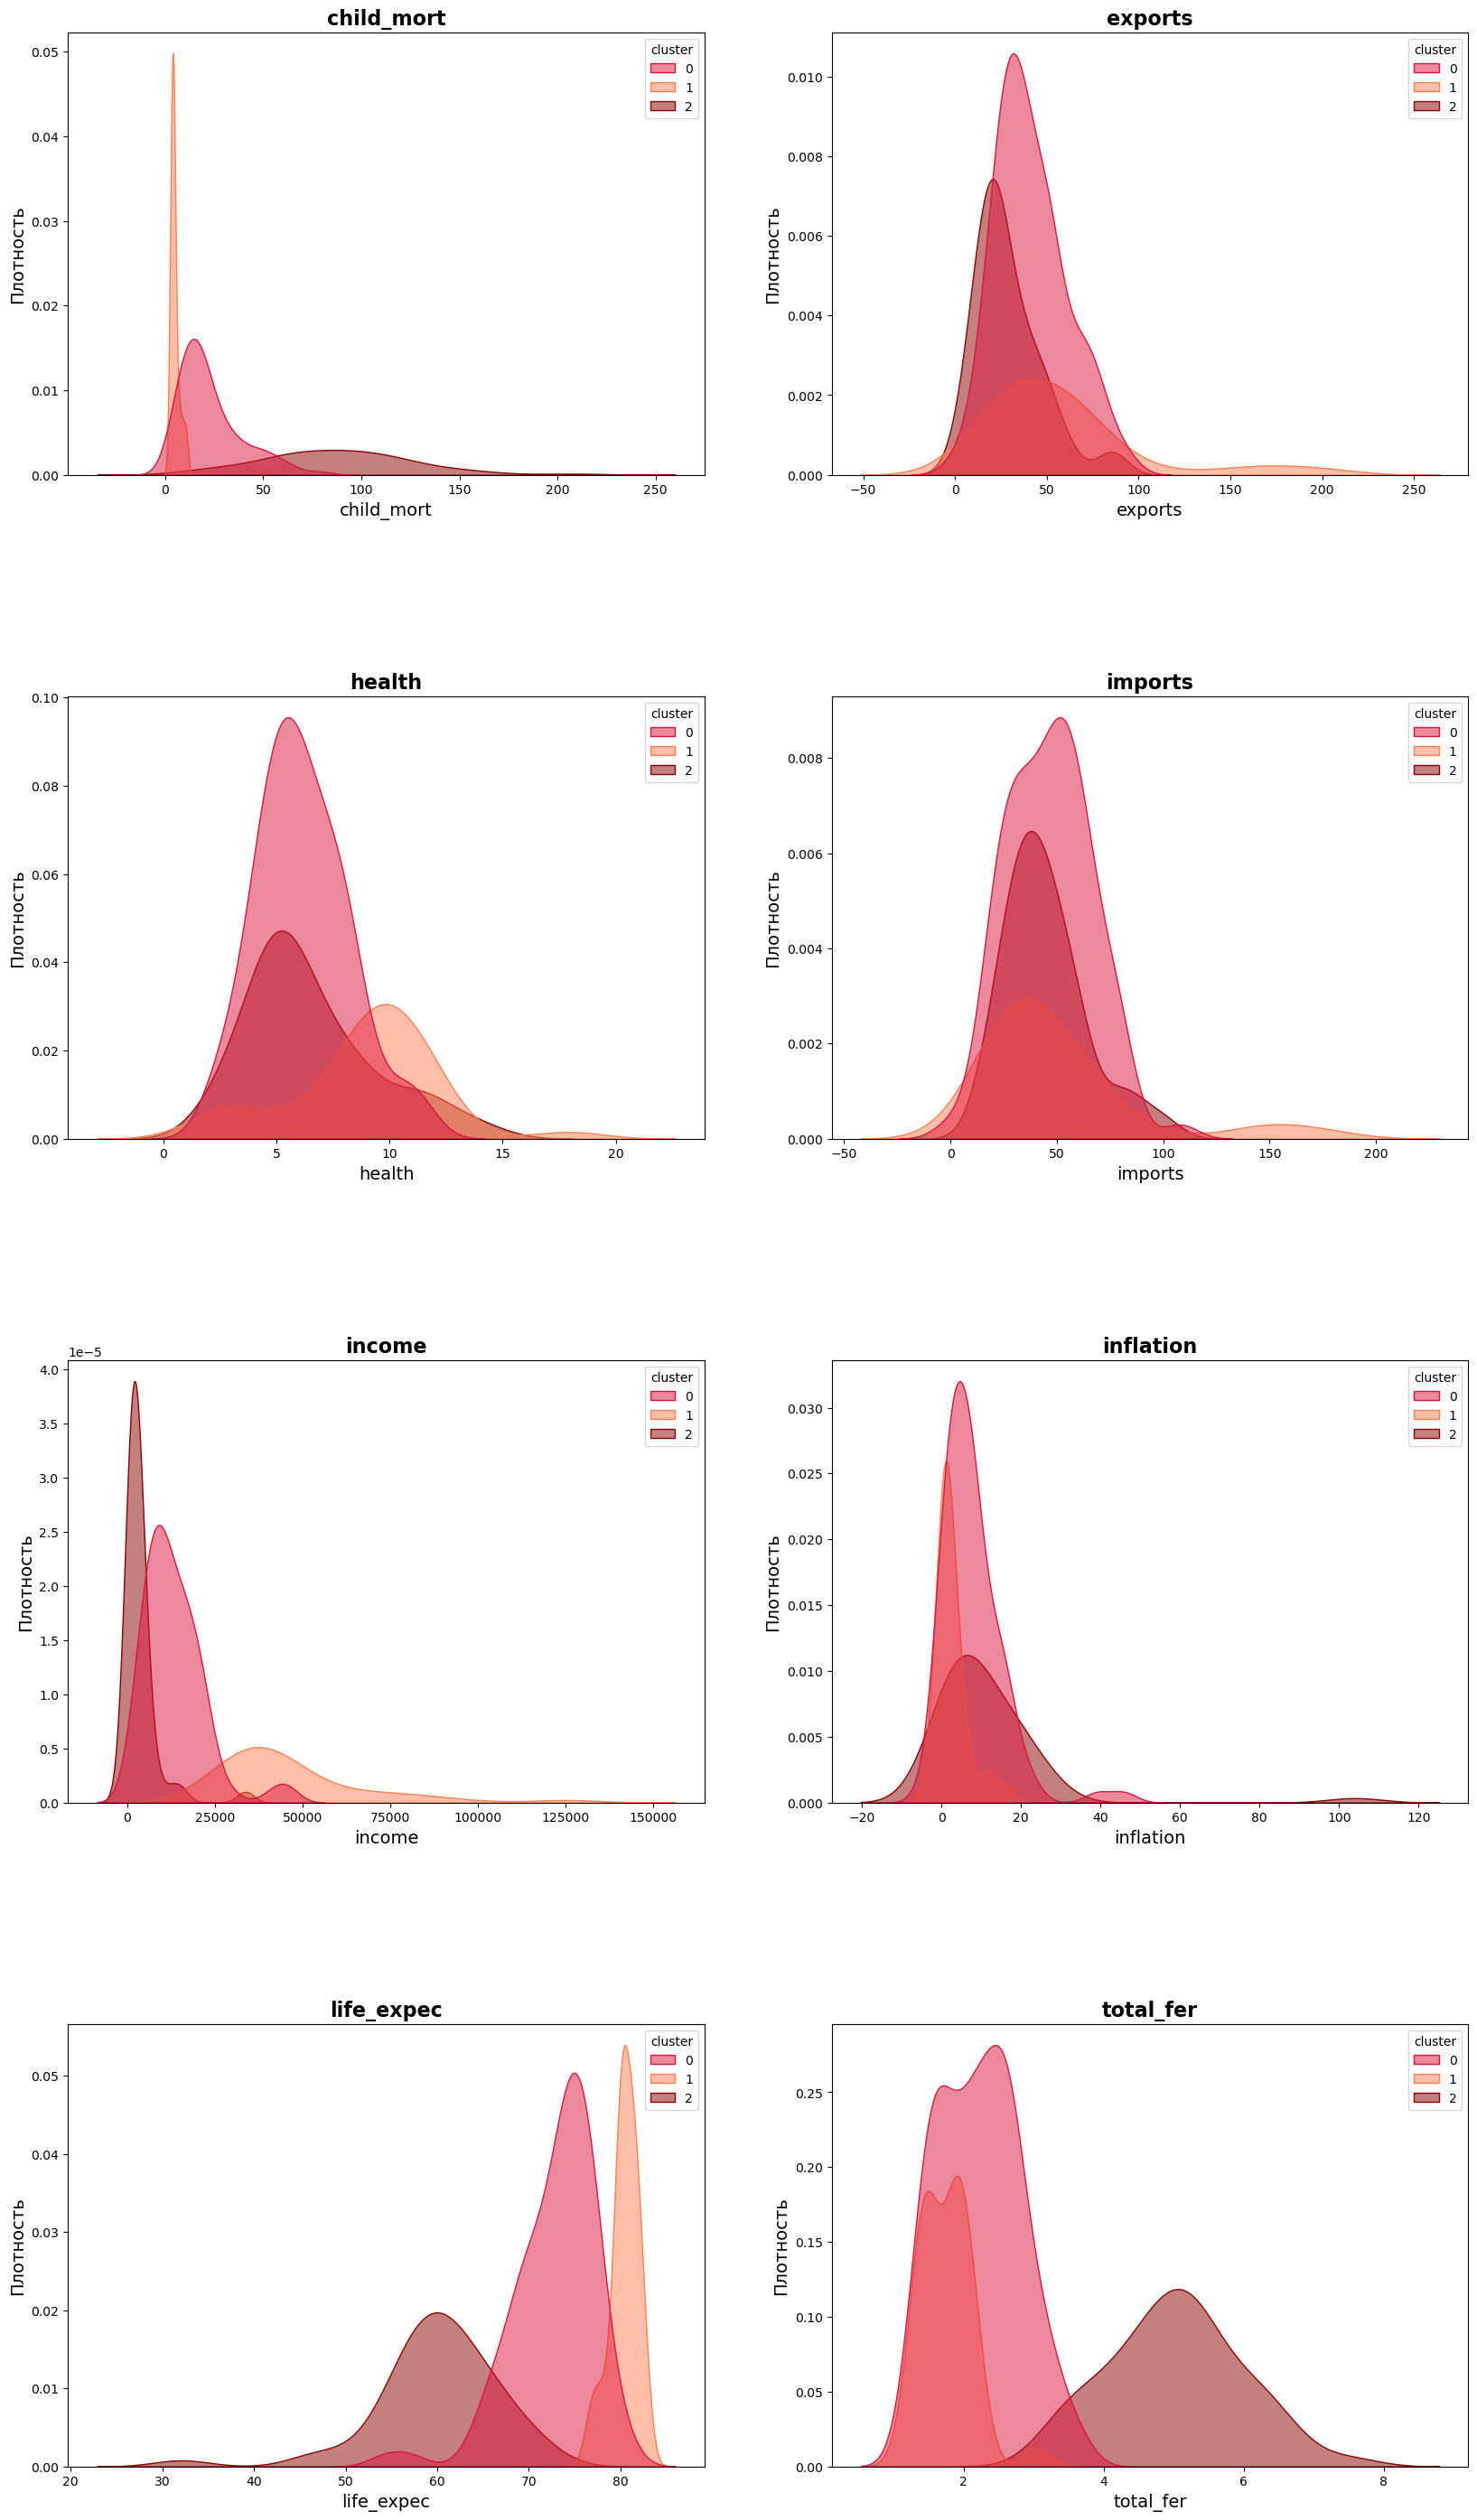

In [388]:
fig, axes = plt.subplots(4, 2, figsize=(20, 35))
plt.subplots_adjust(hspace=0.5)

columns = X

axes = axes.flatten()

for i, (column, ax) in enumerate(zip(columns, axes)):
    sns.kdeplot(data=df,
                palette=['#DC143C', '#FF7F50', '#8B0000'],
                x=column,
                fill=True,
                alpha=0.5,
                hue='cluster',
                ax=ax)

    ax.set_title(column, fontweight='bold', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Плотность', fontsize=14)

    

plt.show()




# Итог

При предобработки данных, аномалий выявлено не было. При проведении кластеризации мы выбрали 3 группы кластеров основываясь на методе локтя. При самой кластеризации мы построили график:
 - ScatterPlot
 - 2DPCA
 - 3DPCA
 - Dendrogramm

При обучении моделей классификации, было взято 3 модели. 